## 1- ANÁLISIS PRELIMINAR

In [50]:
# Importamos todas las librerias que vamos a utilizar.

import pandas as pd
import numpy as np
from datetime import datetime
import cufflinks as cf
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cf.go_offline()

### 1.1 TABLA SELLOUT1

In [51]:
# Importamos la tabla Sellout1 y previsualizamos.

sellout1 = pd.read_csv(r"C:\Users\apico\Downloads\sellout-proveedor1.csv")
sellout1.head()

,Sku,Date,Store_Id,Units,Price
0,4220015,2017-01-01 SO Diaria Piezas,18,6.0,15.6
1,4220015,2017-01-01 SO Diaria Piezas,24,0.0,0.0
2,4220015,2017-01-01 SO Diaria Piezas,39,0.0,0.0
3,4220015,2017-01-01 SO Diaria Piezas,44,0.0,0.0
4,4220015,2017-01-01 SO Diaria Piezas,46,0.0,0.0


In [52]:
# Eliminar "SO Diaria Piezas" de la columna 'Date' y modificar a formato fecha español.

sellout1['Date'] = sellout1['Date'].str.replace('SO Diaria Piezas', '')
sellout1['Date'] = pd.to_datetime(sellout1['Date'])
sellout1['Date'] = sellout1['Date'].dt.strftime('%d/%m/%Y')

# Poner en español todos los nombres de las columnas.

sellout1 = sellout1.rename(columns={'Sku':'Referencia',
                                    'Date':'Fecha',
                                    'Store_Id':'Id_Tienda',
                                    'Units':'Unidades',
                                    'Price':'Precio'})
sellout1.head()

,Referencia,Fecha,Id_Tienda,Unidades,Precio
0,4220015,01/01/2017,18,6.0,15.6
1,4220015,01/01/2017,24,0.0,0.0
2,4220015,01/01/2017,39,0.0,0.0
3,4220015,01/01/2017,44,0.0,0.0
4,4220015,01/01/2017,46,0.0,0.0


### HIPÓTESIS 1

##### ANALISIS DE LOS REGISTROS CON VALORES NEGATIVOS EN LAS COLUMNAS 'UNIDADES' Y 'PRECIO'

1.-Filtrar los registros con valores negativos en la columna 'Unidades' y positivos en la columna 'Precio'

In [53]:
consulta1_negativos = sellout1[(sellout1['Unidades'] < 0) & (sellout1['Precio'] > 0)]

# Imprimir los resultados
print(consulta1_negativos)

         Referencia       Fecha  Id_Tienda  Unidades     Precio
3373        4220015  05/02/2017        166     -1.00  15.600000
7651        4220015  22/03/2017        174     -2.00  16.300000
7848        4220015  24/03/2017        236    -11.00  16.150000
7918        4220015  25/03/2017        138     -6.00  16.300000
8318        4220015  29/03/2017        231     -1.00  16.000000
...             ...         ...        ...       ...        ...
1067562     4789544  15/01/2017        246     -0.90  46.666667
1084443     4789544  27/03/2017        175     -4.50  50.955556
1085576     4789544  01/04/2017        108     -0.90  56.111111
1124498     4809797  14/04/2017        248     -0.25  40.000000
1191947     4829827  01/04/2017        240     -0.75  27.200000

[64 rows x 5 columns]


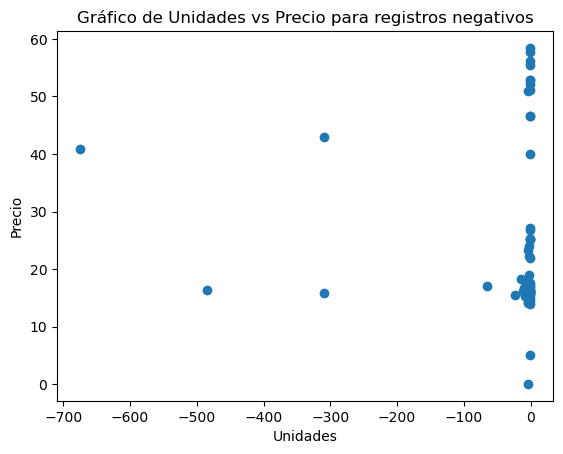

In [54]:
# Graficar los resultados
plt.scatter(consulta1_negativos['Unidades'], consulta1_negativos['Precio'])
plt.xlabel('Unidades')
plt.ylabel('Precio')
plt.title('Gráfico de Unidades vs Precio para registros negativos')
plt.show()

2.- Filtrar los registros con valores positivos en la columna 'Unidades' y negativos en la columna 'Precio'

In [55]:
consulta2_negativos = sellout1[(sellout1['Unidades'] > 0) & (sellout1['Precio'] < 0)]

# Imprimir los resultados
print(consulta2_negativos)

         Referencia       Fecha  Id_Tienda  Unidades  Precio
24749       4230022  06/05/2017        130     11.00   -4.89
50329       4240039  10/04/2017         44     11.00  -16.14
79258       4250046  09/03/2017         60      2.00  -24.36
528925      4554143  04/03/2017        248      3.00   -4.30
629173      4615034  09/03/2017         60      1.00  -25.20
643556      4615034  10/05/2017        144      3.00 -106.00
1019837     4769520  06/05/2017        130      6.00 -190.05
1126620     4809797  24/04/2017          7      0.25  -24.20
1127829     4809797  29/04/2017        102      0.25  -29.88
1166200     4819810  12/05/2017         61      0.25  -71.56
1168828     4819810  23/05/2017        255      1.50   -6.12


3.- Filtrar los registros con valores negativos en la columna 'Unidades' y negativos en la columna 'Precio'

In [57]:
consulta3_negativos = sellout1[(sellout1['Unidades'] < 0) & (sellout1['Precio'] < 0)]

# Imprimir los resultados
print(consulta3_negativos)

        Referencia       Fecha  Id_Tienda  Unidades  Precio
117490     4260053  20/03/2017        159     -2.00   -9.04
679582     4625287  12/05/2017          5     -0.75   -3.60


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 1

* Punto 1, hemos filtrado los registros con valores negativos en la columna 'Unidades' y positivos en la columna 'Precio'. Se han detectado 64 Referencias con Unidades con valores negativos. Esto podría deberse a los siguientes motivos:

    - Devoluciones de productos o cancelaciones de pedidos que ya habian sido ingresados con un precio positivo.
    - Descuentos o promociones.
    - Problemas de inventario al realizarse un mal seguimiento de las existencias. Es posible una sobreventa al venderse más         productos de los que hay disponibles.
        * SE PROPONE NO ELIMINAR ESTOS REGISTROS

* Punto 2, hemos filtrado los registros con valores positivos en la columna 'Unidades' y negativos en la columna 'Precio'. Se han detectado 11 Referencias con Precios con valores negativos. Esto podría deberse al siguiente motivo:

    - Devoluciones parciales con descuentos aplicados y precio ajustado a las unidades devueltas.
        * SE PROPONE NO ELIMINAR ESTOS REGISTROS

* Punto 3, hemos filtrado los registros con valores negativos en la columna 'Unidades' y negativos en la columna 'Precio'. Se han detectado 2 Referencias con Unidades y Precio con valores negativos. Esto podía deberse al siguiente motivo:

    - Errores de cálculo o de entrada de datos durante la recopilación o registro.
        * SE PROPONE ELIMINAR ESTOS REGISTROS

### HIPÓTESIS 2

##### ANALISIS DE LOS REGISTROS CON VALORES CERO EN LAS COLUMNAS 'UNIDADES' Y 'PRECIO'

1.-Buscamos registros con valores 0 en la columna 'Unidades' y 'Precio' mayor que 0.

In [59]:
consulta1_valor_0 = sellout1.loc[(sellout1['Unidades'] == 0) & (sellout1['Precio'] > 0)]

print(consulta1_valor_0)

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []


2.-Buscamos registros con valores 0 en la columna 'Precio' y 'Unidades' mayor que 0.

In [60]:
consulta2_valor_0 = sellout1.loc[(sellout1['Unidades'] > 0) & (sellout1['Precio'] == 0)]

print(consulta2_valor_0.head())

       Referencia       Fecha  Id_Tienda  Unidades  Precio
25679     4230022  17/05/2017        681       4.0     0.0
25759     4230022  18/05/2017        681      11.0     0.0
26079     4230022  22/05/2017        681       5.0     0.0
28063     4240039  05/01/2017          5       2.0     0.0
28196     4240039  05/01/2017        172       2.0     0.0


3.- Buscamos registros con valores 0 en la columna 'Unidades' y 'Precio'.

In [61]:
consulta3_valor_0 = sellout1.loc[(sellout1['Unidades'] == 0) & (sellout1['Precio'] == 0)]

consulta3_valor_0.head()

,Referencia,Fecha,Id_Tienda,Unidades,Precio
1,4220015,01/01/2017,24,0.0,0.0
2,4220015,01/01/2017,39,0.0,0.0
3,4220015,01/01/2017,44,0.0,0.0
4,4220015,01/01/2017,46,0.0,0.0
5,4220015,01/01/2017,47,0.0,0.0


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 2

* Punto 1, no hemos encontrado registros que correspondan a la hipótesis.
   
* Punto 2, hemos detectado 110 registros con unidades positivas a precio 0, que pueden deberse a pedidos de muestra.
   * SE PROPONE NO ELIMINAR ESTOS REGISTROS
   
* Punto 3, hemos filtrado los registros con valor 0 en ambas columnas y se han detectado más de medio millón de registros. Esto podía deberse al siguiente motivo:

  - Errores de cálculo o de entrada de datos durante la recopilación o registro.
       * SE PROPONE ELIMINAR ESTOS REGISTROS


### HIPÓTESIS 3

##### COMPROBAR SI EXISTEN VALORES ATÍPICOS

In [62]:
# Mostramos todas las referencias para buscar valores atípicos.

sellout1['Referencia'].unique()

array([4220015, 4230022, 4240039, 4250046, 4260053, 4330800, 4351043,
       4361050, 4381425, 4391449, 4412040, 4422187, 4432194, 4442378,
       4473122, 4523924, 4533931, 4543948, 4554143, 4574433, 4584464,
       4604976,    5027, 4615034, 4625287, 4635546, 4645560, 4655669,
       4665676, 4675706, 4685881, 4697052, 4709131, 4719179, 4739414,
       4749421, 4759438, 4769520, 4779537, 4789544, 4809797, 4819810,
       4829827], dtype=int64)

In [63]:
# Filtramos las filas de la referencia '5027' porque no cuadra con el resto de las referencias.

consulta1_ref_atipica = sellout1.loc[sellout1['Referencia'] == 5027]

print(f"Tenemos {consulta1_ref_atipica['Referencia'].count()} registros de la referencia 5027.")

# Cosultamos si todos los registros de la referencia 5027 están en blanco.

consulta2_ref_atipica = consulta1_ref_atipica.loc[(consulta1_ref_atipica['Unidades'] == 0) & (consulta1_ref_atipica['Precio'] == 0)]

print(f"Los {consulta1_ref_atipica['Referencia'].count()} registros tienen valor 0 en las unidades y el precio.")

Tenemos 465 registros de la referencia 5027.
Los 465 registros tienen valor 0 en las unidades y el precio.


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 3

  * La referencia 5027 en la columna 'Referencia' parece no corresponder al catalogo. No presenta la misma codificación y no tiene compras asociadas.
    * SE PROPONE ELIMINAR ESTOS REGISTROS

### HIPÓTESIS 4

##### EXISTENCIA DE CELDAS EN BLANCO, NULAS O DUPLICAS

In [64]:
# Mostrar si aparecen celdas en blanco o nulas.

celdas_en_blanco = sellout1.isnull() | sellout1.eq('')
filas_con_blancos = sellout1[celdas_en_blanco.any(axis=1)]
print(filas_con_blancos)

# Mostrar si aparecen celdas duplicadas.

duplicadas = sellout1[sellout1.duplicated()]
print(duplicadas)

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []
Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 4

No hay registros en blanco, nulos o duplicados

### HIPÓTESIS 5

#### ANALISIS DE LOS REGISTROS NEGATIVOS EN TABLA SELLOUT1 CON RESPECTO A SELLIN.

In [65]:
# Importamos tabla provisional sellin1.

sellin1 = pd.read_csv(r"C:\Users\apico\Downloads\sellin-total.csv")

# Filtrar los valores de 'Units' que son iguales o menores a 0 en Sellout 1
sellout1_negativos = sellout1[sellout1['Unidades'] <= 0]

# Agrupar los valores filtrados por 'Referencia' en Sellout 1
agrupacion_sellout1 = sellout1_negativos.groupby('Referencia')['Unidades'].sum()

# Obtener los valores únicos de 'Referencia' en sellin
valores_sellin = set(sellin1['Sku'])

# Verificar los valores que no existen en sellin
valores_no_en_sellin1 = set(set(agrupacion_sellout1.index) - valores_sellin)

print("Referencias en sellout1 que no existen en sellin1:")
print(valores_no_en_sellin1)

Referencias en sellout1 que no existen en sellin1:
{4473122, 5027, 4412040, 4759438, 4584464, 4604976, 4645560, 4391449, 4635546, 4685881}


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 5

* Aparecen registros negativos en la columna 'Unidades' en las columnas del Sellout 1 que no existen en Sellin. Esto podría deberse al siguiente motivo:
    - Errores de cálculo o de entrada de datos durante la recopilación o registro.
    - Datos desactualizados u obsoletos
      * SE PROPONE ELIMINAR ESTOS REGISTROS

### MODIFICACIONES TABLA SELLOUT1

In [66]:
# Damos nueva codificicación a la tabla para separar modificaciones.

selloutp1 = sellout1

# Damos formato a la fecha para poder modificarla.

selloutp1['Fecha'] = pd.to_datetime(selloutp1['Fecha'])

# Añadimos dos columnas nuevas que luego nos serviran de filtro.

selloutp1.insert(loc=2, column='Dia', value=selloutp1['Fecha'].dt.strftime('%d'))
selloutp1.insert(loc=2, column='Mes', value=selloutp1['Fecha'].dt.strftime('%m'))
selloutp1.insert(loc=2, column='Año', value=selloutp1['Fecha'].dt.strftime('%Y'))

# Modificamos a formato fecha español.

selloutp1['Fecha'] = selloutp1['Fecha'].dt.strftime('%d/%m/%Y')

# Añadimos columna con el total de las ventas realizadas

selloutp1['Total'] = selloutp1['Unidades'] * selloutp1['Precio']

selloutp1.head()


C:\Users\apico\AppData\Local\Temp\ipykernel_1460\2467395773.py:7: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4220015,01/01/2017,2017,01,01,18,6.0,15.6,93.6
1,4220015,01/01/2017,2017,01,01,24,0.0,0.0,0.0
2,4220015,01/01/2017,2017,01,01,39,0.0,0.0,0.0
3,4220015,01/01/2017,2017,01,01,44,0.0,0.0,0.0
4,4220015,01/01/2017,2017,01,01,46,0.0,0.0,0.0


In [67]:
# Se eliminan los registros con valores negativos en la columna 'Unidades' y 'Precio' (HIPÓTESIS 1)


selloutp1 = selloutp1.drop(selloutp1.loc[(selloutp1['Unidades'] < 0) & (selloutp1['Precio'] < 0)].index)

selloutp1

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4220015,01/01/2017,2017,01,01,18,6.00,15.6,93.6
1,4220015,01/01/2017,2017,01,01,24,0.00,0.0,0.0
2,4220015,01/01/2017,2017,01,01,39,0.00,0.0,0.0
3,4220015,01/01/2017,2017,01,01,44,0.00,0.0,0.0
4,4220015,01/01/2017,2017,01,01,46,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1206360,4829827,06/04/2017,2017,04,06,705,0.00,0.0,0.0
1206361,4829827,06/04/2017,2017,04,06,706,0.00,0.0,0.0
1206362,4829827,06/04/2017,2017,04,06,707,0.75,27.2,20.4
1206363,4829827,06/04/2017,2017,04,06,708,0.00,0.0,0.0


In [68]:
# Se eliminan todos los registros con valor 0 en la columna 'Unidades' y 'Precio'(HIPOTESIS 2)

selloutp1 = selloutp1.drop(selloutp1.loc[(selloutp1['Unidades'] == 0) & (selloutp1['Precio'] == 0)].index)

selloutp1

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4220015,01/01/2017,2017,01,01,18,6.00,15.6,93.6
8,4220015,01/01/2017,2017,01,01,60,8.00,15.6,124.8
19,4220015,01/01/2017,2017,01,01,98,8.00,15.6,124.8
22,4220015,01/01/2017,2017,01,01,106,1.00,15.6,15.6
23,4220015,01/01/2017,2017,01,01,107,2.00,15.6,31.2
...,...,...,...,...,...,...,...,...,...
1206350,4829827,06/04/2017,2017,04,06,668,1.00,27.2,27.2
1206351,4829827,06/04/2017,2017,04,06,670,1.50,27.2,40.8
1206356,4829827,06/04/2017,2017,04,06,700,0.50,27.2,13.6
1206357,4829827,06/04/2017,2017,04,06,701,0.25,27.2,6.8


In [69]:
# Se eliminan todos los registros de la referencia 5027(HIPÓTESIS 3)

selloutp1 = selloutp1.drop(selloutp1.loc[selloutp1['Referencia'] == 5027].index)

selloutp1

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4220015,01/01/2017,2017,01,01,18,6.00,15.6,93.6
8,4220015,01/01/2017,2017,01,01,60,8.00,15.6,124.8
19,4220015,01/01/2017,2017,01,01,98,8.00,15.6,124.8
22,4220015,01/01/2017,2017,01,01,106,1.00,15.6,15.6
23,4220015,01/01/2017,2017,01,01,107,2.00,15.6,31.2
...,...,...,...,...,...,...,...,...,...
1206350,4829827,06/04/2017,2017,04,06,668,1.00,27.2,27.2
1206351,4829827,06/04/2017,2017,04,06,670,1.50,27.2,40.8
1206356,4829827,06/04/2017,2017,04,06,700,0.50,27.2,13.6
1206357,4829827,06/04/2017,2017,04,06,701,0.25,27.2,6.8


In [70]:
# Eliminar unidades negativas de la tabla que no aparecen en la tabla Sellin(HIPÓTESIS 3)

selloutp1 = selloutp1[~selloutp1['Referencia'].isin(valores_no_en_sellin1)]

selloutp1

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4220015,01/01/2017,2017,01,01,18,6.00,15.6,93.6
8,4220015,01/01/2017,2017,01,01,60,8.00,15.6,124.8
19,4220015,01/01/2017,2017,01,01,98,8.00,15.6,124.8
22,4220015,01/01/2017,2017,01,01,106,1.00,15.6,15.6
23,4220015,01/01/2017,2017,01,01,107,2.00,15.6,31.2
...,...,...,...,...,...,...,...,...,...
1206350,4829827,06/04/2017,2017,04,06,668,1.00,27.2,27.2
1206351,4829827,06/04/2017,2017,04,06,670,1.50,27.2,40.8
1206356,4829827,06/04/2017,2017,04,06,700,0.50,27.2,13.6
1206357,4829827,06/04/2017,2017,04,06,701,0.25,27.2,6.8


In [71]:
# Mostramos información de la tabla para comprobar tipos de datos.

selloutp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585199 entries, 0 to 1206362
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Referencia  585199 non-null  int64  
 1   Fecha       585199 non-null  object 
 2   Año         585199 non-null  object 
 3   Mes         585199 non-null  object 
 4   Dia         585199 non-null  object 
 5   Id_Tienda   585199 non-null  int64  
 6   Unidades    585199 non-null  float64
 7   Precio      585199 non-null  float64
 8   Total       585199 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 44.6+ MB


In [72]:
# Modificamos tipo de las columnas que corresponda. 
selloutp1[['Año', 'Mes','Dia']] = selloutp1[['Año', 'Mes','Dia']].astype(int)
selloutp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585199 entries, 0 to 1206362
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Referencia  585199 non-null  int64  
 1   Fecha       585199 non-null  object 
 2   Año         585199 non-null  int32  
 3   Mes         585199 non-null  int32  
 4   Dia         585199 non-null  int32  
 5   Id_Tienda   585199 non-null  int64  
 6   Unidades    585199 non-null  float64
 7   Precio      585199 non-null  float64
 8   Total       585199 non-null  float64
dtypes: float64(3), int32(3), int64(2), object(1)
memory usage: 38.0+ MB


##### RESUMEN ACCIONES A REALIZADAS EN TABLA SELLOUT 1

* Eliminar "SO Diaria Piezas" de la columna 'Date'.
* Modificar fecha a formato español en la columna 'Date'.
* Extraer una columna 'Total', que multiplque 'Units' por 'Price'.
* Extraer una columna 'Año', que solo especifique el año.  
* Extraer una columna 'Mes', que solo especifique el mes.
* Extraer una columna 'Dia', que solo especifique el año.  
* Poner en español todos los nombres de las columnas.
* Comprobar si existen valores nulos o filas duplicadas.
* Se eliminan todos los registros con valores negativos en la columna 'Unidades' y 'Precio'(Hipótesis 1).
* Se eliminan todos los registros con valor 0 en la columna 'Unidades' y 'Precio'(Hipótesis 2).
* Se eliminan todos los registros de la referencia 5027(Hipótesis 3).
* Eliminar unidades negativas de la tabla que no aparecen en la tabla Sellin(Hipótesis 5).

## 1.2 TABLA SELLOUT2

In [73]:
# Importamos la tabla Sellout1 y previsualizamos.
sellout2 = pd.read_csv(r"C:\Users\apico\Downloads\sellout-proveedor2.csv")
sellout2.head()

,Sku,Date,Store_Id,Pieces,Price
0,4240039,2016/01/01,1000,23.0,$16.00
1,4240039,2016/01/01,1001,116.0,$16.00
2,4240039,2016/01/01,1002,146.0,$16.00
3,4240039,2016/01/01,1003,17.0,$16.80
4,4240039,2016/01/01,1004,5.0,$16.70


In [74]:
# Eliminamos de la columna Price el simbolo del '$'  y lo pasamos a formato float

sellout2['Price'] = sellout2['Price'].str.replace('$', '')
sellout2['Price'] = sellout2['Price'].astype(float)

# Modificamos formato fecha para que se adapte a la fecha española

sellout2['Date'] = pd.to_datetime(sellout2['Date'])
sellout2['Date'] = sellout2['Date'].dt.strftime('%d/%m/%Y')


# Poner en español todos los nombres de las columnas.

sellout2 = sellout2.rename(columns={'Sku':'Referencia',
                                    'Date':'Fecha',
                                    'Store_Id':'Id_Tienda',
                                    'Pieces':'Unidades',
                                    'Price':'Precio'})
sellout2.head()

C:\Users\apico\AppData\Local\Temp\ipykernel_1460\2698530000.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Referencia,Fecha,Id_Tienda,Unidades,Precio
0,4240039,01/01/2016,1000,23.0,16.0
1,4240039,01/01/2016,1001,116.0,16.0
2,4240039,01/01/2016,1002,146.0,16.0
3,4240039,01/01/2016,1003,17.0,16.8
4,4240039,01/01/2016,1004,5.0,16.7


### HIPÓTESIS 1

##### EXISTENCIA DE CELDAS EN BLANCO, NULAS O DUPLICAS

In [75]:
# Mostrar si aparecen celdas en blanco o nulas.

celdas_en_blanco2 = sellout2.isnull() | sellout2.eq('')
filas_con_blancos2 = sellout2[celdas_en_blanco2.any(axis=1)]
print(filas_con_blancos2)

# Mostrar si aparecen celdas duplicadas.

duplicadas2 = sellout2[sellout2.duplicated()]
print(duplicadas2)

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []
         Referencia       Fecha  Id_Tienda  Unidades  Precio
4816200     4709131  08/08/2016       1902       2.0    13.5
4816235     4709131  08/08/2016       2375       3.0    13.5
4820982     4709131  17/08/2016       3790       2.0    14.2


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 1

* Aparecen registros aparentemente duplicados pero no es así.
    - SE PROPONE NO ELIMINAR ESOS REGISTROS

### HIPÓTESIS 2

#### ANALISIS DE LOS REGISTROS CON VALORES CERO EN LAS COLUMNAS 'UNIDADES' Y 'PRECIO'

1.-Buscamos registros con valores 0 en la columna 'Unidades' y 'Precio' mayor que 0.

In [76]:
consulta4_valor_0 = sellout2.loc[(sellout2['Unidades'] == 0) & (sellout2['Precio'] > 0)]

print(consulta4_valor_0.head())

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []


2.-Buscamos registros con valores 0 en la columna 'Precio' y 'Unidades' mayor que 0.

In [77]:
consulta5_valor_0 = sellout2.loc[(sellout2['Unidades'] > 0) & (sellout2['Precio'] == 0)]

print(consulta5_valor_0.head())

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []


3.- Buscamos registros con valores 0 en la columna 'Unidades' y 'Precio'.

In [78]:
consulta6_valor_0 = sellout2.loc[(sellout2['Unidades'] == 0) & (sellout2['Precio'] == 0)]

print(consulta6_valor_0.head())

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 2

No hemos encontrado registros que correspondan a ninguna de las hipótesis.

### HIPÓTESIS 3

#### ANALISIS DE LOS REGISTROS CON VALORES NEGATIVOS EN LAS COLUMNAS 'UNIDADES' Y 'PRECIO'

1.- Filtrar los registros con valores negativos en la columna 'Unidades' y positivos en la columna 'Precio'

In [79]:
consulta4_negativos = sellout2[(sellout2['Unidades'] < 0) & (sellout2['Precio'] > 0)]

# Imprimir los resultados
print(consulta4_negativos)

         Referencia       Fecha  Id_Tienda  Unidades  Precio
813         4240039  01/01/2016       3113      -6.0   16.00
4755        4240039  31/10/2016       2092      -9.0   16.40
5966        4240039  01/11/2016       1641     -28.0   15.90
19010       4240039  10/11/2016       3089      -8.0   16.80
40607       4240039  26/11/2016       1623      -1.0   15.50
...             ...         ...        ...       ...     ...
4847538     4729193  01/12/2016       1038     -47.0   17.90
4848975     4729193  03/12/2016       3902      -4.0   17.90
4850934     4729193  07/12/2016       2766      -2.0   18.55
4851358     4729193  08/12/2016       2540      -2.0   18.00
4861928     4729193  30/12/2016       3875      -4.0   17.90

[293 rows x 5 columns]


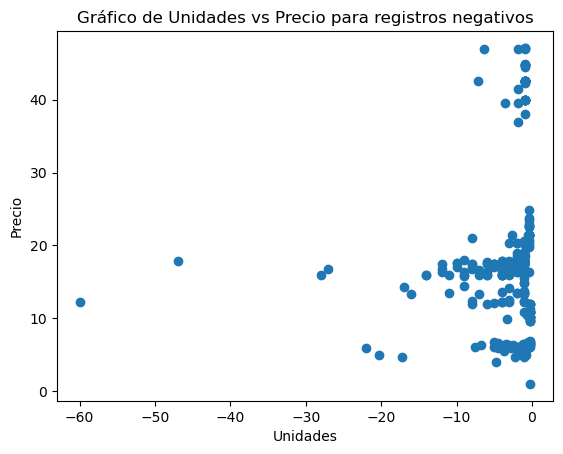

In [80]:
# Graficar los resultados
plt.scatter(consulta4_negativos['Unidades'], consulta4_negativos['Precio'])
plt.xlabel('Unidades')
plt.ylabel('Precio')
plt.title('Gráfico de Unidades vs Precio para registros negativos')
plt.show()

2.- Filtrar los registros con valores positivos en la columna 'Unidades' y negativos en la columna 'Precio'

In [81]:
consulta5_negativos = sellout2[(sellout2['Unidades'] > 0) & (sellout2['Precio'] < 0)]

# Imprimir los resultados
print(consulta5_negativos)

         Referencia       Fecha  Id_Tienda  Unidades  Precio
779481      4270121  07/02/2016       1486       1.8  -10.37
1158518     4290336  18/04/2016       3053       0.9  -23.50
4208500     4635546  31/10/2016       1408       1.0   -0.02


3.- Filtrar los registros con valores negativos en la columna 'Unidades' y negativos en la columna 'Precio'

In [83]:
consulta6_negativos = sellout2[(sellout2['Unidades'] < 0) & (sellout2['Precio'] < 0)]

# Imprimir los resultados
print(consulta6_negativos)

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio]
Index: []


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 3

* Punto 1, hemos filtrado los registros con valores negativos en la columna 'Unidades' y positivos en la columna 'Precio'. Se han detectado 293 Referencias con Unidades con valores negativos. Esto podría deberse a los siguientes motivos:

    - Devoluciones de productos o cancelaciones de pedidos que ya habian sido ingresados con un precio positivo.
    - Descuentos o promociones.
    - Problemas de inventario al realizarse un mal seguimiento de las existencias. Es posible una sobreventa al venderse más         productos de los que hay disponibles.
        * SE PROPONE NO ELIMINAR ESTOS REGISTROS
* Punto 2, hemos filtrado los registros con valores positivos en la columna 'Unidades' y negativos en la columna 'Precio'. Se han detectado 3 Referencias con Precios con valores negativos. Esto podría deberse al siguiente motivo:

    - Devoluciones parciales con descuentos aplicados y precio ajustado a las unidades devueltas.
        * SE PROPONE NO ELIMINAR ESTOS REGISTROS
* En el punto 3, hemos filtrado los registros con valores negativos en la columna 'Unidades' y negativos en la columna 'Precio'. Se han detectado 0 Referencias con Unidades y Precio con valores negativos. 

### HIPÓTESIS 4

#### ANALISIS DE LOS REGISTROS NEGATIVOS EN TABLA SELLOUT2 CON RESPECTO A SELLIN.

In [84]:
# Filtrar los valores de 'Units' que son iguales o menores a 0 en Sellout2
sellout2_negativos = sellout2[sellout2['Unidades'] <= 0]

# Agrupar los valores filtrados por 'Referencia' en Sellout2
agrupacion_sellout2 = sellout2_negativos.groupby('Referencia')['Unidades'].sum()

# Obtener los valores únicos de 'Referencia' en sellin
valores2_sellin1 = set(sellin1['Sku'])

# Verificar los valores que no existen en sellin
valores2_no_en_sellin1 = set(set(agrupacion_sellout2.index) - valores2_sellin1)

print("Referencias en Sellout2 que no existen en sellin1:")
print(valores2_no_en_sellin1)

Referencias en Sellout2 que no existen en sellin1:
{4290336, 4412040, 4270121, 4584464, 4604976, 4300343, 4645560, 4391449, 4635546, 4685881}


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 4

* Aparecen registros negativos en la columna 'Unidades' en las columnas del Sellout 2 que no existen en Sellin. Esto podría deberse al siguiente motivo:
    - Errores de cálculo o de entrada de datos durante la recopilación o registro.
    - Datos desactualizados u obsoletos
      * SE PROPONE ELIMINAR ESTOS REGISTROS

### MODIFICACIONES TABLA SELLOUT2  

In [85]:
# Damos nueva codificicación a la tabla para separar modificaciones.

selloutp2 = sellout2

# Damos formato a la fecha para poder modificarla.

selloutp2['Fecha'] = pd.to_datetime(selloutp2['Fecha'])

# Añadimos dos columnas nuevas que luego nos serviran de filtro.

selloutp2.insert(loc=2, column='Dia', value=selloutp2['Fecha'].dt.strftime('%d'))
selloutp2.insert(loc=2, column='Mes', value=selloutp2['Fecha'].dt.strftime('%m'))
selloutp2.insert(loc=2, column='Año', value=selloutp2['Fecha'].dt.strftime('%Y'))

# Modificamos a formato fecha español.

selloutp2['Fecha'] = selloutp2['Fecha'].dt.strftime('%d/%m/%Y')

# Añadimos columna con el total de las ventas realizadas

selloutp2['Total'] = selloutp2['Unidades'] * selloutp2['Precio']

selloutp2.head()

C:\Users\apico\AppData\Local\Temp\ipykernel_1460\807330985.py:7: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4240039,01/01/2016,2016,01,01,1000,23.0,16.0,368.0
1,4240039,01/01/2016,2016,01,01,1001,116.0,16.0,1856.0
2,4240039,01/01/2016,2016,01,01,1002,146.0,16.0,2336.0
3,4240039,01/01/2016,2016,01,01,1003,17.0,16.8,285.6
4,4240039,01/01/2016,2016,01,01,1004,5.0,16.7,83.5


In [86]:
# Eliminar unidades negativas de la tabla que no aparecen en la tabla Sellin(HIPÓTESIS 4)

selloutp2 = selloutp2[~selloutp2['Referencia'].isin(valores2_no_en_sellin1)]

selloutp2

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4240039,01/01/2016,2016,01,01,1000,23.0,16.00,368.00
1,4240039,01/01/2016,2016,01,01,1001,116.0,16.00,1856.00
2,4240039,01/01/2016,2016,01,01,1002,146.0,16.00,2336.00
3,4240039,01/01/2016,2016,01,01,1003,17.0,16.80,285.60
4,4240039,01/01/2016,2016,01,01,1004,5.0,16.70,83.50
...,...,...,...,...,...,...,...,...,...
4862024,4729193,30/12/2016,2016,12,30,5827,14.0,17.90,250.60
4862025,4729193,30/12/2016,2016,12,30,5850,3.0,17.90,53.70
4862026,4729193,30/12/2016,2016,12,30,5851,3.0,16.00,48.00
4862027,4729193,30/12/2016,2016,12,30,5855,21.0,16.86,354.06


In [87]:
# Mostramos información de la tabla para comprobar tipos de datos.

selloutp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3531975 entries, 0 to 4862028
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Referencia  int64  
 1   Fecha       object 
 2   Año         object 
 3   Mes         object 
 4   Dia         object 
 5   Id_Tienda   int64  
 6   Unidades    float64
 7   Precio      float64
 8   Total       float64
dtypes: float64(3), int64(2), object(4)
memory usage: 269.5+ MB


In [88]:
# Modificamos tipo de las columnas que corresponda. 
selloutp2[['Año', 'Mes','Dia']] = selloutp2[['Año', 'Mes','Dia']].astype(int)
selloutp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3531975 entries, 0 to 4862028
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Referencia  int64  
 1   Fecha       object 
 2   Año         int32  
 3   Mes         int32  
 4   Dia         int32  
 5   Id_Tienda   int64  
 6   Unidades    float64
 7   Precio      float64
 8   Total       float64
dtypes: float64(3), int32(3), int64(2), object(1)
memory usage: 229.0+ MB


##### RESUMEN ACCIONES A REALIZADAS TABLA SELLOUT2

* Eliminar el simbolo del dolar en la columna 'Price' y pasarlo a formato float.
* Modificar fecha a formato español en la columna 'Date'.
* Extraer una columna 'Total', que multiplque 'Units' por 'Price'.
* Extraer una columna 'Año', que solo especifique el año.  
* Extraer una columna 'Mes', que solo especifique el mes.
* Extraer una columna 'Dia', que solo especifique el año.  
* Poner en español todos los nombres de las columnas.
* Eliminar unidades negativas de la tabla que no aparecen en la tabla Sellin(Hipótesis 4)

## 1.3 TABLA SELLIN

In [89]:
# Importamos la tabla Sellin y previsualizamos.

sellin = pd.read_csv(r"C:\Users\apico\Downloads\sellin-total.csv")
sellin.head()

,Sku,Date,Store_Id,Pieces,Price,Margin
0,4220015,02/01/2015,100,20.0,13.01,9.78
1,4220015,02/01/2015,116,20.0,13.01,9.78
2,4220015,02/01/2015,141,80.0,13.01,9.78
3,4220015,02/01/2015,146,10.0,13.01,9.78
4,4220015,02/01/2015,151,20.0,13.09,9.87


In [90]:
# Poner en español todos los nombres de las columnas.

sellin = sellin.rename(columns={'Sku':'Referencia',
                                'Date':'Fecha',
                                'Store_Id':'Id_Tienda',
                                'Pieces':'Unidades',
                                'Price':'Precio',
                                'Margin':'Margen'})
sellin.head()

,Referencia,Fecha,Id_Tienda,Unidades,Precio,Margen
0,4220015,02/01/2015,100,20.0,13.01,9.78
1,4220015,02/01/2015,116,20.0,13.01,9.78
2,4220015,02/01/2015,141,80.0,13.01,9.78
3,4220015,02/01/2015,146,10.0,13.01,9.78
4,4220015,02/01/2015,151,20.0,13.09,9.87


### HIPÓTESIS 1

##### EXISTENCIA DE CELDAS EN BLANCO, NULAS O DUPLICAS

In [91]:
# Mostrar si aparecen celdas en blanco o nulas.

celdas_en_blanco3 = sellin.isnull() | sellin.eq('')
filas_con_blancos3 = sellin[celdas_en_blanco3.any(axis=1)]
print(filas_con_blancos3)

# Mostrar si aparecen celdas duplicadas.

duplicadas3 = sellin[sellin.duplicated()]
print(duplicadas3)

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio, Margen]
Index: []
         Referencia       Fecha  Id_Tienda  Unidades  Precio  Margen
3422063     4769520  10/03/2017       2384      9.60   43.41   33.39
3422311     4769520  11/03/2017       2476      0.00   43.41   33.39
3424887     4769520  24/03/2017       3051      4.80   43.41   33.39
3677719     4779537  11/03/2017       1471      5.40   42.03   33.45
3679818     4779537  21/03/2017       3902     32.40   42.03   33.45
3680887     4779537  27/03/2017       1195     10.80   42.03   33.45
3681045     4779537  27/03/2017       3734     10.80   42.03   33.45
3875079     4789544  11/03/2017       1471     21.60   42.65   34.96
3875374     4789544  13/03/2017       3893     10.80   42.65   34.96
3875485     4789544  14/03/2017       2840    162.00   42.65   34.96
3876159     4789544  18/03/2017       5700      0.00   42.65   34.96
4031909     4809797  24/03/2017        661      6.75   20.29   14.37
4032919    

#### CONCLUSIONES ANÁLISIS HIPÓTESIS 1

* Aparecen registros aparentemente duplicados pero no es así.
    - SE PROPONE NO ELIMINAR ESOS REGISTROS

### HIPÓTESIS 2

#### ANALISIS DE LOS REGISTROS CON VALORES CERO EN LAS COLUMNAS 'UNIDADES' Y 'PRECIO'

1.-Buscamos registros con valores 0 en la columna 'Unidades' y 'Precio' mayor que 0.

In [92]:
consulta7_valor_0 = sellin.loc[(sellin['Unidades'] == 0) & (sellin['Precio'] > 0)]

print(consulta7_valor_0.head())

     Referencia       Fecha  Id_Tienda  Unidades  Precio  Margen
24      4220015  02/01/2015       1161       0.0   12.59    9.36
136     4220015  02/01/2015       5843       0.0   12.72    9.49
171     4220015  03/01/2015       1202       0.0   12.59    9.36
279     4220015  03/01/2015       4128       0.0   12.59    9.36
438     4220015  05/01/2015       5730       0.0   12.59    9.36


2.-Buscamos registros con valores 0 en la columna 'Precio' y 'Unidades' mayor que 0.

In [93]:
consulta8_valor_0 = sellin.loc[(sellin['Unidades'] > 0) & (sellin['Precio'] == 0)]

print(consulta8_valor_0.head())

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio, Margen]
Index: []


3.- Buscamos registros con valores 0 en la columna 'Unidades' y 'Precio'.

In [94]:
consulta9_valor_0 = sellin.loc[(sellout1['Unidades'] == 0) & (sellin['Precio'] == 0)]

print(consulta9_valor_0.head())

Empty DataFrame
Columns: [Referencia, Fecha, Id_Tienda, Unidades, Precio, Margen]
Index: []


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 2

* Punto 1, se encuentran registros con precio marcado pero unidades 0.
    - Errores de cálculo o de entrada de datos durante la recopilación o registro.
       * SE PROPONE ELIMINAR ESTOS REGISTROS
       
* Punto 2, no se encuentran registros.
* Punto 3, no se encuentran registros.

### HIPÓTESIS 3

##### COMPROBAR SI EXISTE ALGÚN CÓDIGO QUE EXISTE EN SELLOUT1 Y SELLOUT2, PERO QUE NO EXISTE EN SELLIN

In [95]:
# Obtener los valores únicos de la columna 'Referencia' en sellout1 y sellout2
valores_sellout1 = set(sellout1['Referencia'])
valores_sellout2 = set(sellout2['Referencia'])

# Verificar si hay valores en sellout1 que no existen en sellin
valores_no_sellout1 = valores_sellout1 - set(sellin['Referencia'])

# Verificar si hay valores en sellout2 que no existen en sellin
valores_no_sellout2 = valores_sellout2 - set(sellin['Referencia'])

# Imprimir los valores que no existen en sellin
print("Valores de 'Referencia' de Sellout 1 que no existen en Sellin")
print(valores_no_sellout1)

print("Valores de 'Referencia' en Sellout 2 que no existen en Sellin:")
print(valores_no_sellout2)


Valores de 'Referencia' de Sellout 1 que no existen en Sellin
{4473122, 5027, 4412040, 4759438, 4584464, 4604976, 4645560, 4391449, 4635546, 4685881}
Valores de 'Referencia' en Sellout 2 que no existen en Sellin:
{4290336, 4473122, 4371364, 4412040, 4270121, 4584464, 4604976, 4300343, 4645560, 4391449, 4635546, 4685881}


##### Verificamos si los valores que no existen en el Sellin aparecen en el Maestro de productos.

In [96]:
# Importamos tabla de productos 

maestro_prod = pd.read_csv(r"C:\Users\apico\Downloads\maestro_productos.csv")

# Filtramos los valores únicos que aparecen en el maestro de productos 
valores_maestro_prod = set(maestro_prod['Sku'])

# Comprobamos si tienen elementos en común
valores_catalogo_slin2 = valores_no_sellout1 - valores_maestro_prod
valores_catalogo_slin3 = valores_no_sellout2 - valores_maestro_prod

print(valores_catalogo_slin2) 
print(valores_catalogo_slin3)

{5027}
set()


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 3
* Existen registros en la tabla Sellout 1 y Sellout 2 que no aparecen en la tabla Sellin pero sí aparecen en la tabla de productos. Puede deberse a productos comprados con anterioridad al inicio de los datos en la tabla Sellin.
    * SE PROPONE NO ELIMINAR ESTOS REGISTROS
* Aparece la referencia 5027, ya eliminada en modificaciones anteriores.


### MODIFICACIONES TABLA SELLIN  

In [97]:
# Damos nueva codificicación a la tabla para separar modificaciones.

sellin1 = sellin

# Damos formato a la fecha para poder modificarla.

sellin1['Fecha'] = pd.to_datetime(sellin1['Fecha'])

# Añadimos dos columnas nuevas que luego nos serviran de filtro.

sellin1.insert(loc=2, column='Dia', value=sellin1['Fecha'].dt.strftime('%d'))
sellin1.insert(loc=2, column='Mes', value=sellin1['Fecha'].dt.strftime('%m'))
sellin1.insert(loc=2, column='Año', value=sellin1['Fecha'].dt.strftime('%Y'))

# Modificamos a formato fecha español.

sellin1['Fecha'] = sellin1['Fecha'].dt.strftime('%d/%m/%Y')

# Añadimos columna con el total de las ventas realizadas

sellin1.insert(loc=8, column='Total', value=sellin1['Unidades'] * sellin1['Precio'])

sellin1.head()

C:\Users\apico\AppData\Local\Temp\ipykernel_1460\2088157559.py:7: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total,Margen
0,4220015,01/02/2015,2015,02,01,100,20.0,13.01,260.2,9.78
1,4220015,01/02/2015,2015,02,01,116,20.0,13.01,260.2,9.78
2,4220015,01/02/2015,2015,02,01,141,80.0,13.01,1040.8,9.78
3,4220015,01/02/2015,2015,02,01,146,10.0,13.01,130.1,9.78
4,4220015,01/02/2015,2015,02,01,151,20.0,13.09,261.8,9.87


In [99]:
# Se eliminan registros con valor 0 en las unidades(HIPÓTESIS 2).

sellin1 = sellin1.loc[(sellin1['Unidades'] != 0)]

sellin1


,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total,Margen
0,4220015,01/02/2015,2015,02,01,100,20.00,13.01,260.2000,9.78
1,4220015,01/02/2015,2015,02,01,116,20.00,13.01,260.2000,9.78
2,4220015,01/02/2015,2015,02,01,141,80.00,13.01,1040.8000,9.78
3,4220015,01/02/2015,2015,02,01,146,10.00,13.01,130.1000,9.78
4,4220015,01/02/2015,2015,02,01,151,20.00,13.09,261.8000,9.87
...,...,...,...,...,...,...,...,...,...,...
4188778,4829827,31/05/2017,2017,05,31,3900,33.75,20.51,692.2125,14.62
4188779,4829827,31/05/2017,2017,05,31,4090,20.25,20.51,415.3275,14.62
4188780,4829827,31/05/2017,2017,05,31,4544,6.75,20.51,138.4425,14.62
4188781,4829827,31/05/2017,2017,05,31,5702,33.75,20.51,692.2125,14.62


In [100]:
# Mostramos información de la tabla para comprobar tipos de datos.

sellin1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141833 entries, 0 to 4188782
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Referencia  int64  
 1   Fecha       object 
 2   Año         object 
 3   Mes         object 
 4   Dia         object 
 5   Id_Tienda   int64  
 6   Unidades    float64
 7   Precio      float64
 8   Total       float64
 9   Margen      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 347.6+ MB


In [101]:
# Modificamos tipo de las columnas que corresponda. 
sellin1[['Año', 'Mes','Dia']] = sellin1[['Año', 'Mes','Dia']].astype(int)
sellin1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141833 entries, 0 to 4188782
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Referencia  int64  
 1   Fecha       object 
 2   Año         int32  
 3   Mes         int32  
 4   Dia         int32  
 5   Id_Tienda   int64  
 6   Unidades    float64
 7   Precio      float64
 8   Total       float64
 9   Margen      float64
dtypes: float64(4), int32(3), int64(2), object(1)
memory usage: 300.2+ MB


##### RESUMEN ACCIONES A REALIZADAS TABLA SELLIN

* Poner en español todos los nombres de las columnas.
* Extraer una columna 'Total', que multiplque 'Units' por 'Price'.
* Extraer una columna 'Año', que solo especifique el año.
* Extraer una columna 'Mes', que solo especifique el mes.
* Extraer una columna 'Dia', que solo especifique el día.
* Se eliminan registros con valor 0 en las unidades(HIPÓTESIS 2).


### 1.4 MAESTRO PRODUCTOS

In [102]:
# Importamos la tabla "Maestro productos" y previsualizamos.

maestro_productos = pd.read_csv(r"C:\Users\apico\Downloads\maestro_productos.csv")
maestro_productos.head()

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
0,11058,Frosted Mango,Sugar-free,Cereal bars
1,29207,Nut Cheerios Mango,Super-flavour,Cereal box
2,38379,MultiGrain Mango,Sugar-free,Cereal bars
3,42671,Crunch Mango,Sugar-free,Cereal bars
4,54644,Corn Mango,Sugar-free,Cereal bars


In [103]:
# Poner en español todos los nombres de las columnas.

maestro_productos = maestro_productos.rename(columns={'Sku':'Referencia',
                                                      'Sku_Description':'Descripcion',
                                                      'Sku_Category':'Categoria',
                                                      'Sku_Subcategory':'Subcategoria'})
maestro_productos.head()

,Referencia,Descripcion,Categoria,Subcategoria
0,11058,Frosted Mango,Sugar-free,Cereal bars
1,29207,Nut Cheerios Mango,Super-flavour,Cereal box
2,38379,MultiGrain Mango,Sugar-free,Cereal bars
3,42671,Crunch Mango,Sugar-free,Cereal bars
4,54644,Corn Mango,Sugar-free,Cereal bars


### HIPÓTESIS 1

##### EXISTENCIA DE CELDAS EN BLANCO, NULAS O DUPLICAS

In [104]:
# Mostrar si aparecen celdas en blanco o nulas.

celdas_en_blanco4 = maestro_productos.isnull() | maestro_productos.eq('')
filas_con_blancos4 = maestro_productos[celdas_en_blanco4.any(axis=1)]
print(filas_con_blancos4)

# Mostrar si aparecen celdas duplicadas.

duplicadas4 = maestro_productos[maestro_productos.duplicated()]
print(duplicadas4)

Empty DataFrame
Columns: [Referencia, Descripcion, Categoria, Subcategoria]
Index: []
Empty DataFrame
Columns: [Referencia, Descripcion, Categoria, Subcategoria]
Index: []


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 1

* No aparecen registros duplicados o nulos.

In [105]:
# Mostramos información de la tabla para comprobar tipos de datos.

maestro_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Referencia    1242 non-null   int64 
 1   Descripcion   1242 non-null   object
 2   Categoria     1242 non-null   object
 3   Subcategoria  1242 non-null   object
dtypes: int64(1), object(3)
memory usage: 38.9+ KB


##### RESUMEN ACCIONES A REALIZADAS EN MAESTRO PRODUCTOS

* Poner en español todos los nombres de las columnas.


### 1.5 MAESTRO CLIENTES

In [106]:
# Importamos la tabla "Maestro clientes" y previsualizamos.

maestro_clientes = pd.read_excel(r"C:\Users\apico\Downloads\maestro_clientes.xlsx")
maestro_clientes.head()

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
2,5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
3,6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
4,7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


In [107]:
# Modificar descripciones de las columnas.

maestro_clientes = maestro_clientes.rename(columns={'NUM TDA':'Id_Tienda',
                                                    'NOMBRE DE TDA':'Nombre Tienda',
                                                    'CADENA':'Proveedor',
                                                    'FORMATO':'Formato',
                                                    'MUNICIPIO/CIUDAD':'Municipio/Ciudad',
                                                    'ESTADO':'Estado',
                                                    'DIVISION':'Division',
                                                    'DEPOSITO / DISTRIBUIDOR':'Deposito/Distribuidor',
                                                    'ESTRUCTURA':'Estructura',
                                                    'GRADO':'Grado'})
maestro_clientes.head()

,Id_Tienda,Nombre Tienda,Proveedor,Formato,Municipio/Ciudad,Estado,Division,Deposito/Distribuidor,Estructura,Grado
0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
2,5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
3,6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
4,7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


### HIPÓTESIS 1

##### EXISTENCIA DE CELDAS EN BLANCO, NULAS O DUPLICAS

In [108]:
# Mostrar si aparecen celdas en blanco o nulas.

celdas_en_blanco5 = maestro_clientes.isnull() | maestro_productos.eq('')
filas_con_blancos5 = maestro_clientes[celdas_en_blanco5.any(axis=1)]
print(filas_con_blancos5)

# Mostrar si aparecen celdas duplicadas.

duplicadas5 = maestro_clientes[maestro_clientes.duplicated()]
print(duplicadas5)

Empty DataFrame
Columns: [Id_Tienda, Nombre Tienda, Proveedor, Formato, Municipio/Ciudad, Estado, Division, Deposito/Distribuidor, Estructura, Grado]
Index: []
Empty DataFrame
Columns: [Id_Tienda, Nombre Tienda, Proveedor, Formato, Municipio/Ciudad, Estado, Division, Deposito/Distribuidor, Estructura, Grado]
Index: []


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 1

* No aparecen registros duplicados o nulos.

### HIPÓTESIS 2

##### NUMEROS DE TIENDA QUE APAREZCAN EN LAS TABLAS SELLOUT1, SELLOUT2 Y SELLIN PERO NO APAREZCAN EN EL MAESTRO DE CLIENTES

In [109]:
# Buscar los valores de 'Store_Id' en df1, df2 y df3
valores_tienda_sellin = set(sellin ['Id_Tienda'])
valores_tienda_sellout1 = set(sellout1['Id_Tienda'])
valores_tienda_sellout2 = set(sellout2['Id_Tienda'])

# Verificar si hay valores de 'Id_Tienda' que no aparecen en 'NUM TDA' de df5
valores_no_en_maestro_clientes = []
for valor in valores_tienda_sellin.union(valores_tienda_sellout1, valores_tienda_sellout2):
    if valor not in maestro_clientes['Id_Tienda'].values:
        valores_no_en_maestro_clientes.append(valor)

# Agrupar los valores en uno solo y eliminar duplicados
valores_no_en_maestro_clientes = list(set(valores_no_en_maestro_clientes))

# Imprimir los valores que no aparecen en maestro_clientes
print("Tiendas que no aparecen en el registro de tiendas del maestro_clientes:")
print(valores_no_en_maestro_clientes)

Tiendas que no aparecen en el registro de tiendas del maestro_clientes:
[1664, 675, 676, 709, 711, 712, 681, 2313, 301, 174, 78, 1326, 85, 1398, 2364, 94]


#### CONCLUSIONES ANÁLISIS HIPÓTESIS 2
* Aparecen tiendas en las tablas que no existen en el maestro de clientes. Posibles motivos:
    - Puede tratarse de nuevas tiendas y que no el maestro de clientes no esté actulizado. Todas las ventas aparecen a partir de noviembre del 2016.
      * SE PROPONE NO ELIMINAR ESTOS REGISTROS


In [110]:
# Mostramos información de la tabla para comprobar tipos de datos.

maestro_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id_Tienda              2452 non-null   int64 
 1   Nombre Tienda          2452 non-null   object
 2   Proveedor              2452 non-null   object
 3   Formato                2452 non-null   object
 4   Municipio/Ciudad       2452 non-null   object
 5   Estado                 2452 non-null   object
 6   Division               2452 non-null   object
 7   Deposito/Distribuidor  2452 non-null   object
 8   Estructura             2452 non-null   object
 9   Grado                  2452 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.7+ KB


##### ACCIONES A REALIZADAS MAESTRO CLIENTES

* Poner en español todos los nombres de las columnas.

## 2- ANÁLISIS EXPLORATORIO TABLAS

In [111]:
selloutp1.head()

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4220015,01/01/2017,2017,1,1,18,6.0,15.6,93.6
8,4220015,01/01/2017,2017,1,1,60,8.0,15.6,124.8
19,4220015,01/01/2017,2017,1,1,98,8.0,15.6,124.8
22,4220015,01/01/2017,2017,1,1,106,1.0,15.6,15.6
23,4220015,01/01/2017,2017,1,1,107,2.0,15.6,31.2


In [112]:
selloutp2.head()

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total
0,4240039,01/01/2016,2016,1,1,1000,23.0,16.0,368.0
1,4240039,01/01/2016,2016,1,1,1001,116.0,16.0,1856.0
2,4240039,01/01/2016,2016,1,1,1002,146.0,16.0,2336.0
3,4240039,01/01/2016,2016,1,1,1003,17.0,16.8,285.6
4,4240039,01/01/2016,2016,1,1,1004,5.0,16.7,83.5


In [113]:
sellin1.head()

,Referencia,Fecha,Año,Mes,Dia,Id_Tienda,Unidades,Precio,Total,Margen
0,4220015,01/02/2015,2015,2,1,100,20.0,13.01,260.2,9.78
1,4220015,01/02/2015,2015,2,1,116,20.0,13.01,260.2,9.78
2,4220015,01/02/2015,2015,2,1,141,80.0,13.01,1040.8,9.78
3,4220015,01/02/2015,2015,2,1,146,10.0,13.01,130.1,9.78
4,4220015,01/02/2015,2015,2,1,151,20.0,13.09,261.8,9.87


In [117]:
maestro_productos.head()

,Referencia,Descripcion,Categoria,Subcategoria
0,11058,Frosted Mango,Sugar-free,Cereal bars
1,29207,Nut Cheerios Mango,Super-flavour,Cereal box
2,38379,MultiGrain Mango,Sugar-free,Cereal bars
3,42671,Crunch Mango,Sugar-free,Cereal bars
4,54644,Corn Mango,Sugar-free,Cereal bars


In [118]:
maestro_clientes.head()

,Id_Tienda,Nombre Tienda,Proveedor,Formato,Municipio/Ciudad,Estado,Division,Deposito/Distribuidor,Estructura,Grado
0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
2,5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
3,6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
4,7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


## PROGRAMA 1 CONSULTAS SELLIN SELLOUT1 Y SELLOUT2



El programa pregunta al usuario por la 'Referencia', 'Id_Tienda' y un rango de fechas (fecha_inicio y fecha_fin) y compara el total del 'Sellin', 'Sellout1' y 'Sellout2' de esa referencia para esa determinada tienda.

In [119]:

# Hacemos un primer filtro de columnas para tener solo la información que necesitamos

selloutpp1 = selloutp1[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]
selloutpp2 = selloutp2[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]
sellinn1 = sellin1[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]

# Declaramos las variables para que el usuario introduzca los datos

fecha_inicio = input("Ingrese la fecha de inicio (DD/MM/YYYY): ")
fecha_fin = input("Ingrese la fecha de fin (DD/MM/YYYY): ")
referencias = int(input("Ingrese el Código Referencias: "))
tienda = int(input("Ingrese el número de tienda: "))

# Filtramos todos los datos introducidos para obtener los valores deseados

sellinn1_filtrado = sellinn1[(sellinn1['Fecha'] >= fecha_inicio) & (sellinn1['Fecha'] <= fecha_fin) & (sellinn1['Referencia'] == referencias) & (sellinn1['Id_Tienda'] == tienda)]
selloutpp1_filtrado = selloutpp1[(selloutpp1['Fecha'] >= fecha_inicio) & (selloutpp1['Fecha'] <= fecha_fin) & (selloutpp1['Referencia'] == referencias) & (selloutpp1['Id_Tienda'] == tienda)]
selloutpp2_filtrado = selloutpp2[(selloutpp2['Fecha'] >= fecha_inicio) & (selloutpp2['Fecha'] <= fecha_fin) & (selloutpp2['Referencia'] == referencias) & (selloutpp2['Id_Tienda'] == tienda)]

# Hacemos un segundo filtro de columnas para tener solo la información que necesitamos

selloutpp1_filtrado = selloutpp1_filtrado[['Referencia', 'Id_Tienda','Total']]
selloutpp2_filtrado = selloutpp2_filtrado[['Referencia', 'Id_Tienda','Total']]
sellinn1_filtrado = sellinn1_filtrado[['Referencia', 'Id_Tienda','Total']]

# Renombramos la columna 'Total' para que nos salga el detalle en la tabla.

selloutpp1_filtrado = selloutpp1_filtrado.rename(columns={'Total': 'Cantidad_sellout1'})
selloutpp2_filtrado = selloutpp2_filtrado.rename(columns={'Total': 'Cantidad_sellout2'})
sellinn1_filtrado = sellinn1_filtrado.rename(columns={'Total': 'Cantidad_sellin'})

# Realizamos condicional para corregir la existencia de tablas vacias

if selloutpp1_filtrado.empty:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp2_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df['Cantidad_sellout1'] = 0
elif selloutpp2_filtrado.empty:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp1_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df['Cantidad_sellout2'] = 0
elif sellinn1_filtrado.empty:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp1_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df['Cantidad_sellin'] = 0
else:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp1_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df = pd.merge(merged_df, selloutpp2_filtrado, on=['Referencia', 'Id_Tienda'])    

# Agrupamos los datos para que nos salga un resumen de todas las compras    
    
tabla_agrupada = merged_df.groupby(['Referencia', 'Id_Tienda']).sum()[['Cantidad_sellin', 'Cantidad_sellout1', 'Cantidad_sellout2']]

# Realizamos la resta para obtner la diferencia.

merge_sellin = merged_df['Cantidad_sellin'].sum()    
merge_sellout1 = merged_df['Cantidad_sellout1'].sum()   
merge_sellout2 = merged_df['Cantidad_sellout2'].sum()

tabla_agrupada['Diferencia'] = merge_sellin - (merge_sellout1 + merge_sellout2)

tabla_agrupada

Ingrese la fecha de inicio (DD/MM/YYYY): 01/01/2015
Ingrese la fecha de fin (DD/MM/YYYY): 30/09/2017
Ingrese el Código Referencias: 4220015
Ingrese el número de tienda: 116


,,Cantidad_sellin,Cantidad_sellout1,Cantidad_sellout2,Diferencia
Referencia,Id_Tienda,,,,
4220015,116,3732153.0,626848.59,0,3105304.41


## PROGRAMA 2 CONSULTAS SELLIN SELLOUT1 Y SELLOUT2

El programa pregunta al usuario por la 'Referencia', 'Id_Tienda' y un rango de fechas (fecha_inicio y fecha_fin) y devuelve una comparativa entre el 'Sellin', 'Sellout1' y 'Sellout2' de esa referencia para esa determinada tienda.

In [120]:
# Hacemos un primer filtro de columnas para tener solo la información que necesitamos

selloutpp1 = selloutp1[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]
selloutpp2 = selloutp2[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]
sellinn1 = sellin1[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]

# Declaramos las variables para que el usuario introduzca los datos

fecha_inicio = input("Ingrese la fecha de inicio (DD/MM/YYYY): ")
fecha_fin = input("Ingrese la fecha de fin (DD/MM/YYYY): ")
referencias = int(input("Ingrese el Código Referencias: "))
tienda = int(input("Ingrese el número de tienda: "))

# Filtramos todos los datos introducidos para obtener los valores deseados

sellinn1_filtrado = sellinn1[(sellinn1['Fecha'] >= fecha_inicio) & (sellinn1['Fecha'] <= fecha_fin) & (sellinn1['Referencia'] == referencias) & (sellinn1['Id_Tienda'] == tienda)]
selloutpp1_filtrado = selloutpp1[(selloutpp1['Fecha'] >= fecha_inicio) & (selloutpp1['Fecha'] <= fecha_fin) & (selloutpp1['Referencia'] == referencias) & (selloutpp1['Id_Tienda'] == tienda)]
selloutpp2_filtrado = selloutpp2[(selloutpp2['Fecha'] >= fecha_inicio) & (selloutpp2['Fecha'] <= fecha_fin) & (selloutpp2['Referencia'] == referencias) & (selloutpp2['Id_Tienda'] == tienda)]

# Hacemos un segundo filtro de columnas para tener solo la información que necesitamos

selloutpp1_filtrado = selloutpp1_filtrado[['Referencia', 'Id_Tienda','Total']]
selloutpp2_filtrado = selloutpp2_filtrado[['Referencia', 'Id_Tienda','Total']]
sellinn1_filtrado = sellinn1_filtrado[['Referencia', 'Id_Tienda','Total']]

# Renombramos la columna 'Total' para que nos salga el detalle en la tabla.

selloutpp1_filtrado = selloutpp1_filtrado.rename(columns={'Total': 'Cantidad_sellout1'})
selloutpp2_filtrado = selloutpp2_filtrado.rename(columns={'Total': 'Cantidad_sellout2'})
sellinn1_filtrado = sellinn1_filtrado.rename(columns={'Total': 'Cantidad_sellin'})

# Realizamos condicional para corregir la existencia de tablas vacias

if selloutpp1_filtrado.empty:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp2_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df['Cantidad_sellout1'] = 0
elif selloutpp2_filtrado.empty:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp1_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df['Cantidad_sellout2'] = 0
elif sellinn1_filtrado.empty:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp1_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df['Cantidad_sellin'] = 0
else:
    merged_df = pd.merge(sellinn1_filtrado, selloutpp1_filtrado, on=['Referencia', 'Id_Tienda'])
    merged_df = pd.merge(merged_df, selloutpp2_filtrado, on=['Referencia', 'Id_Tienda'])    

# Realizamos la resta para obtner la diferencia.

merged_df['Diferencia'] = merged_df['Cantidad_sellin'] - (merged_df['Cantidad_sellout1'] + merged_df['Cantidad_sellout2'])

merged_df

Ingrese la fecha de inicio (DD/MM/YYYY): 01/01/2015
Ingrese la fecha de fin (DD/MM/YYYY): 30/09/2017
Ingrese el Código Referencias: 4220015
Ingrese el número de tienda: 116


,Referencia,Id_Tienda,Cantidad_sellin,Cantidad_sellout1,Cantidad_sellout2,Diferencia
0,4220015,116,260.2,46.8,0,213.4
1,4220015,116,260.2,31.2,0,229.0
2,4220015,116,260.2,62.4,0,197.8
3,4220015,116,260.2,62.4,0,197.8
4,4220015,116,260.2,46.8,0,213.4
...,...,...,...,...,...,...
13648,4220015,116,298.6,32.6,0,266.0
13649,4220015,116,298.6,81.5,0,217.1
13650,4220015,116,298.6,16.3,0,282.3
13651,4220015,116,298.6,65.2,0,233.4


## PROGRAMA 3 CONSULTAS DETALLADO SELLIN SELLOUT1 Y SELLOUT2

El programa pregunta al usuario por la 'Referencia', 'Id_Tienda' y un rango de fechas (fecha_inicio y fecha_fin) y devuelve las unidades, precio y total de cada movimiento realizado.

In [121]:
# Hacemos un primer filtro de columnas para tener solo la información que necesitamos

selloutpp1 = selloutp1[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]
selloutpp2 = selloutp2[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]
sellinn1 = sellin1[['Referencia', 'Fecha', 'Id_Tienda', 'Unidades', 'Precio','Total']]

# Declaramos las variables para que el usuario introduzca los datos

fecha_inicio = input("Ingrese la fecha de inicio (DD/MM/YYYY): ")
fecha_fin = input("Ingrese la fecha de fin (DD/MM/YYYY): ")
referencias = int(input("Ingrese el Código Referencias: "))
tienda = int(input("Ingrese el número de tienda: "))

# Filtramos todos los datos introducidos para obtener los valores deseados

sellinn1_filtrado = sellinn1[(sellinn1['Fecha'] >= fecha_inicio) & (sellinn1['Fecha'] <= fecha_fin) & (sellinn1['Referencia'] == referencias) & (sellinn1['Id_Tienda'] == tienda)]
selloutpp1_filtrado = selloutpp1[(selloutpp1['Fecha'] >= fecha_inicio) & (selloutpp1['Fecha'] <= fecha_fin) & (selloutpp1['Referencia'] == referencias) & (selloutpp1['Id_Tienda'] == tienda)]
selloutpp2_filtrado = selloutpp2[(selloutpp2['Fecha'] >= fecha_inicio) & (selloutpp2['Fecha'] <= fecha_fin) & (selloutpp2['Referencia'] == referencias) & (selloutpp2['Id_Tienda'] == tienda)]

tabla_combinada = pd.concat([sellinn1_filtrado, selloutpp1_filtrado, selloutpp2_filtrado])

tabla_combinada

Ingrese la fecha de inicio (DD/MM/YYYY): 01/01/2015
Ingrese la fecha de fin (DD/MM/YYYY): 30/09/2017
Ingrese el Código Referencias: 4220015
Ingrese el número de tienda: 116


,Referencia,Fecha,Id_Tienda,Unidades,Precio,Total
1,4220015,01/02/2015,116,20.0,13.01,260.2
566,4220015,01/07/2015,116,20.0,13.01,260.2
1092,4220015,01/12/2015,116,20.0,13.01,260.2
1869,4220015,19/01/2015,116,20.0,13.01,260.2
2656,4220015,26/01/2015,116,20.0,13.01,260.2
...,...,...,...,...,...,...
13801,4220015,26/05/2017,116,2.0,16.30,32.6
13896,4220015,27/05/2017,116,5.0,16.30,81.5
14086,4220015,29/05/2017,116,1.0,16.30,16.3
14466,4220015,06/02/2017,116,4.0,16.30,65.2


## PROGRAMA CONSULTAS SELLIN Y CLIENTES
* El programa pregunta al usuario por la 'Referencia', 'Id_Tienda' y un rango de fechas (fecha_inicio y fecha_fin) . Y devuelve como respuesta toda la información disponible entre 'Sellin' y 'Clientes' de una Referencia, Tienda en el rango de fechas especificado.

In [124]:
# Eliminar columnas no necesarias

sellin1_1 = sellin1.drop(['Año', 'Mes','Dia'], axis=1)

# merged sellin y clientes
merged_data = pd.merge(sellin1_1, maestro_clientes, on='Id_Tienda', how='outer')

# Obtener las fechas límite
fecha_inicio = input("Ingrese la fecha de inicio (DD/MM/YYYY): ")
fecha_fin = input("Ingrese la fecha de fin (DD/MM/YYYY): ")

# Convertir las fechas ingresadas a objetos de tipo datetime
fecha_inicio = datetime.strptime(fecha_inicio, "%d/%m/%Y")
fecha_fin = datetime.strptime(fecha_fin, "%d/%m/%Y")

# Convertir la columna 'Fecha' a datetime
merged_data['Fecha'] = pd.to_datetime(merged_data['Fecha'], format="%d/%m/%Y")

# Obtener el Código Sku y el número de tienda
referencia = int(input("Ingrese una Referencia: "))
tienda = int(input("Ingrese el número de tienda: "))

# Filtrar el dataframe según las condiciones dadas
df_filtrado = merged_data[(merged_data['Fecha'] >= fecha_inicio) & (merged_data['Fecha'] <= fecha_fin) & (merged_data['Referencia'] == referencia) & (merged_data['Id_Tienda'] == tienda)]

# Mostrar el dataframe filtrado
df_filtrado

Ingrese la fecha de inicio (DD/MM/YYYY): 01/01/2015
Ingrese la fecha de fin (DD/MM/YYYY): 30/09/2017
Ingrese una Referencia: 4220015
Ingrese el número de tienda: 116


,Referencia,Fecha,Id_Tienda,Unidades,Precio,Total,Margen,Nombre Tienda,Proveedor,Formato,Municipio/Ciudad,Estado,Division,Deposito/Distribuidor,Estructura,Grado
4182,4220015.0,2015-02-01,116,20.0,13.01,260.2,9.78,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4183,4220015.0,2015-07-01,116,20.0,13.01,260.2,9.78,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4184,4220015.0,2015-12-01,116,20.0,13.01,260.2,9.78,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4185,4220015.0,2015-01-19,116,20.0,13.01,260.2,9.78,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4186,4220015.0,2015-01-26,116,20.0,13.01,260.2,9.78,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,4220015.0,2017-04-26,116,20.0,14.93,298.6,10.86,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4308,4220015.0,2017-04-30,116,20.0,14.93,298.6,10.86,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4309,4220015.0,2017-03-05,116,20.0,14.93,298.6,10.86,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV
4310,4220015.0,2017-05-15,116,20.0,14.93,298.6,10.86,Indigo Shop,proveedor_1,Shop,Bad Silver Dirt,Alloralf,METRO-SUR,Rusrusmo Toughworks,METRO,IV


## PROGRAMA CONSULTAS SELLIN Y PRODUCTOS

* El programa pregunta al usuario por la 'Referencia', 'Id_Tienda' y un rango de fechas (fecha_inicio y fecha_fin) . Y devuelve como respuesta, la Descripción del producto, el Total de Unidades y Total de Precio de una Referencia y Tienda en el rango de fechas especificadas.

In [135]:
# merged sellin y productos
merged_d = pd.merge(sellin1, maestro_productos, on=['Referencia'], how='inner')   
        
merged_d['Fecha'] = pd.to_datetime(merged_d['Fecha'], format='%d/%m/%Y')

while True:
    # Solicitar la referencia, id_tienda, fecha de inicio y fecha de fin al usuario
    referencia = int(input("Ingrese la referencia: "))
    id_tienda = int(input("Ingrese el ID de la tienda: "))
    fecha_inicio = input("Ingrese la fecha de inicio (DD/MM/YYYY): ")
    fecha_fin = input("Ingrese la fecha de fin (DD/MM/YYYY): ")

    # Convertir las fechas a formato de fecha
    fecha_inicio = datetime.strptime(fecha_inicio, '%d/%m/%Y')
    fecha_fin = datetime.strptime(fecha_fin, '%d/%m/%Y')

    # Filtrar el DataFrame combinado según la referencia, id_tienda y rango de fechas
    df_filtrado = merged_d[(merged_d['Referencia'] == referencia) & (merged_d['Id_Tienda'] == id_tienda) & (merged_d['Fecha'] >= fecha_inicio) & (merged_d['Fecha'] <= fecha_fin)]

    if not df_filtrado.empty:
        # Calcular el total de unidades y total de precio
        total_unidades = df_filtrado['Unidades'].sum()
        total_precio = df_filtrado['Precio'].sum()

        # Obtener la descripción
        descripcion = df_filtrado['Descripcion'].iloc[0]

        # Mostrar los resultados al usuario
        print("Total de unidades: ", total_unidades)
        print("Total de precio: ", total_precio)
        print("Descripción: ", descripcion)
    else:
        print("No se encontraron registros para la consulta especificada.")

    # Preguntar al usuario si desea hacer otra consulta
    respuesta = input("¿Desea hacer otra consulta? (s/n): ")
    if respuesta.lower() != 's':
        break



Ingrese la referencia: 4220015
Ingrese el ID de la tienda: 100
Ingrese la fecha de inicio (DD/MM/YYYY): 01/01/2015
Ingrese la fecha de fin (DD/MM/YYYY): 01/03/2015
Total de unidades:  600.0
Total de precio:  287.03999999999996
Descripción:  Stars Chocolate
¿Desea hacer otra consulta? (s/n): n
